# Neural Networks

Dataset Information: https://www.kaggle.com/c/zillow-prize-1/data

Dataset Link: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view?usp=sharing

Dataset Description: modified from Zillow's Home Value Prediction Kaggle competition data


**Steps to access, download, and use the dataset:**

* Access the above link to the dataset download "housepricedata.csv".
* Once downloaded, click on the file and save the file in a folder that is easily accessible - E.g. "Documents"
* Open a Google Colab Notebook
  * In the left pane of the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")
  * You are now ready to start using the data in the Colab Notebook!


Data location within Colab: '/content/housepricedata.csv'

Check whick folder in the Google Colab notebook we are currently in?


In [ ]:
pwd

'/content'

Now that we know which folder we are in, how do we see if the data we loaded is correctly loaded or not?

In [ ]:
ls

housepricedata.csv  sample_data/


## Load dataset

In [ ]:
import pandas as pd

In [ ]:
house = pd.read_csv('housepricedata.csv')

In [ ]:
house.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
house

Convert dataframe to array:

In [ ]:
dataset = house.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

## Dataset description & info

In [ ]:
nRow, nCol = house.shape
print(f'There are {nRow} rows and {nCol} columns in this dataset')

There are 1460 rows and 11 columns in this dataset


In [ ]:
house.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [ ]:
house.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

## Pre-Processing the Data

Now, we split the dataset into our input features and the label we wish to predict.

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Build and Train the Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

* Hidden layer 1: 30 neurons, ReLU activation
* Hidden layer 2: 30 neurons, ReLU activation
* Output Layer: 1 neuron, Sigmoid activation

![Neural Network Architecture](https://cdn-media-1.freecodecamp.org/images/H3eAYjXcA2asaCjCYrVT7lc2IIBQGQWzQlPG)

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by

* Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
* Telling it what loss function to use (for binary classification, we will use binary cross entropy)
* Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:

* what data we are training on, which is X_train and Y_train
* the size of our mini-batch
* how long we want to train it for (epochs)
what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5059 - val_loss: 0.6860 - val_accuracy: 0.5479
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5744 - val_loss: 0.6808 - val_accuracy: 0.6119
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.6947 - val_loss: 0.6764 - val_accuracy: 0.6849
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.7104 - val_loss: 0.6724 - val_accuracy: 0.6895
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.7123 - val_loss: 0.6685 - val_accuracy: 0.6804
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.7192 - val_loss: 0.6646 - val_accuracy: 0.6712
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7221 - val_loss: 0.6606 - val_accuracy: 0.6712
Epoch 8/100
3

Evaluating our data on the test set:

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.8995


0.8995434045791626

## Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization:

In [ ]:
import matplotlib.pyplot as plt


We want to visualize the training loss and the validation loss like this:

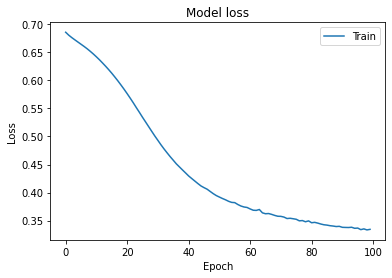

In [ ]:
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

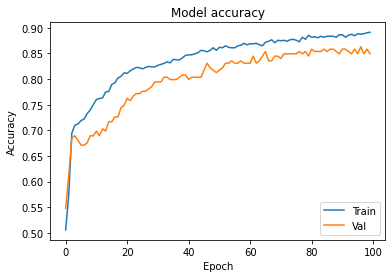

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4773 - accuracy: 0.7730 - val_loss: 0.3932 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3477 - accuracy: 0.8601 - val_loss: 0.3674 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3058 - accuracy: 0.8689 - val_loss: 0.3315 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2664 - accuracy: 0.8982 - val_loss: 0.3712 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2583 - accuracy: 0.8933 - val_loss: 0.2869 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2428 - accuracy: 0.8973 - val_loss: 0.2988 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2254 - accuracy: 0.9031 - val_loss: 0.2873 - val_accuracy: 0.8858
Epoch 

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

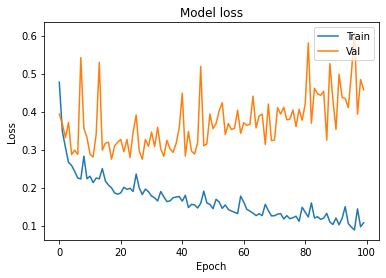

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

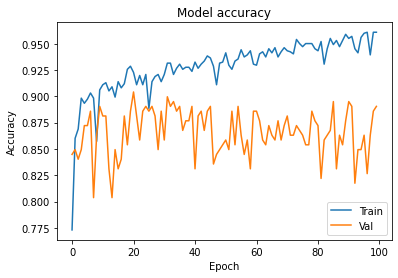

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 47ms/step - loss: 14.2041 - accuracy: 0.7153 - val_loss: 3.8627 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 1.6861 - accuracy: 0.8288 - val_loss: 0.7260 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5890 - accuracy: 0.8503 - val_loss: 0.5632 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5233 - accuracy: 0.8650 - val_loss: 0.5239 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5009 - accuracy: 0.8748 - val_loss: 0.5014 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4891 - accuracy: 0.8679 - val_loss: 0.4976 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4672 - accuracy: 0.8767 - val_loss: 0.5733 - val_accuracy: 0.8219
Epoch

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

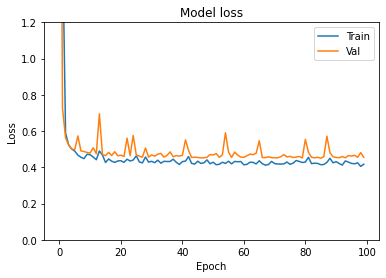

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

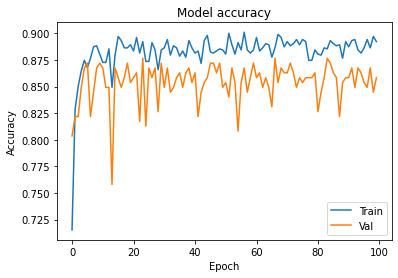

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!

## Resources:



*   https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
*   https://towardsdatascience.com/an-introduction-to-neural-networks-with-implementation-from-scratch-using-python-da4b6a45c05b
*   https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

